In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mubind as mb

import numpy as np
import pandas as pd

import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [3]:
import anndata
import scanpy as sc

In [78]:
k = 10
adata = anndata.read_h5ad('../../data/kmers_adata_ELK1_k%i.h5ad' % k)
# map seqs as string
map_seq2int = 0
if map_seq2int:
    adata.var_names = [mb.tl.string2bin(s) for s in list(adata.var_names)]
    adata.write('../../data/kmers_adata_ELK1_k%i_int.h5ad' % k, compression='lzf')

In [29]:
!ls -ltrh ../../data/kmers_adata_ELK1_*.h5ad

-rwxrwxrwx 1 rio rio 319M May 28 18:05 ../../data/kmers_adata_ELK1_k11.h5ad
-rwxrwxrwx 1 rio rio 255M May 28 19:30 ../../data/kmers_adata_ELK1_k11_int.h5ad
-rwxrwxrwx 1 rio rio 129M May 28 19:56 ../../data/kmers_adata_ELK1_k10.h5ad
-rwxrwxrwx 1 rio rio 234M May 29 00:07 ../../data/kmers_adata_ELK1_k20.h5ad


In [ ]:
sc.set_figure_params(facecolor='white')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
import seaborn as sns
g = sns.clustermap(adata.to_df().T.corr(), cmap='Reds', figsize=[6, 6], xticklabels=False, yticklabels=False)

In [291]:
# adata[adata.obs['tf.name'] == 'ELK1',:]

In [242]:
adata.obs['is.zero'] = pd.Categorical(adata.obs_names.str.contains('Zero'))
adata.obs['tf.name'].value_counts()

ELK1         38
ZEROCYCLE     5
Name: tf.name, dtype: int64

In [32]:
for tf in set(adata.obs['tf.name']):
    print(tf, len(set(adata.obs[adata.obs['tf.name'] == tf]['accession'])))

ZEROCYCLE 2
ELK1 2


In [140]:
# adata[adata.obs['tf.name'].astype(str).str.contains('ELK1') == True,:]

/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


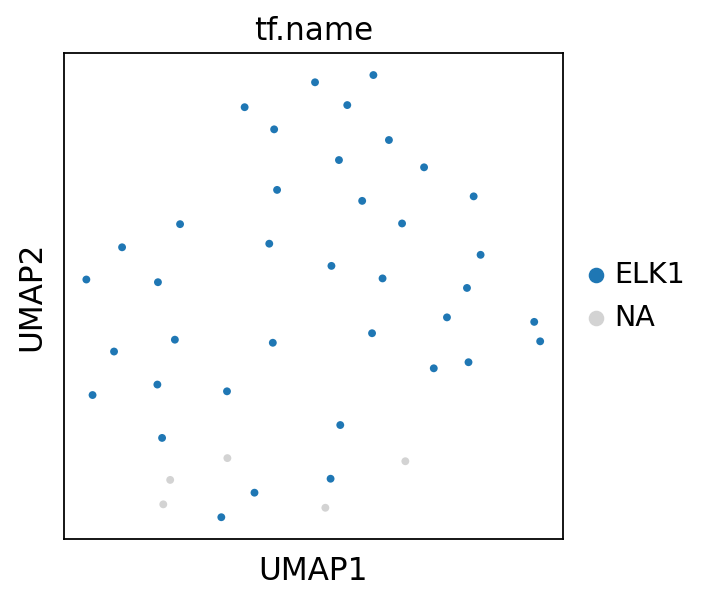

In [141]:
sc.pl.umap(adata, color=['tf.name'], groups=['ELK1'], s=50)

In [36]:
adata.obs['cycle'] = adata.obs['cycle'].astype('category')

In [37]:
sc.pl.umap(adata, color=['is.zero', 'tf.name', 'accession', 'library', 'cycle'], s=50)
sc.pl.pca(adata, color=['is.zero', 'tf.name', 'accession', 'library', 'cycle'], s=50)


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

### Set a model using the anndata representation, for several of the library batches

In [80]:
set(adata.obs['library'])

{'TAGCAG30NACT',
 'TCAGTT40NTTG',
 'TCGCAA40NTGT',
 'TCGGAA20NAGT',
 'TGAGCG40NTTG',
 'TGAGTG20NTGA',
 'TGCCGA40NGTA',
 'TGGTAC40NTCT',
 'TGTTAG40NACC'}

In [60]:
import pandas as pd
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [85]:
df.reindex(df.sum(axis=1).sort_values(ascending=False).index)

,ZeroCycle_TCGGAA20NAGT_0_0,ELK1_TCGGAA20NAGT_AG_1,ELK1_TCGGAA20NAGT_AG_2,ELK1_TCGGAA20NAGT_AG_3,ELK1_TCGGAA20NAGT_AG_4
AACCGGAAGT,2.0,149.0,2547.0,12040.0,6822.0
ACCGGAAGTA,0.0,131.0,2100.0,8904.0,4724.0
ACCGGAAGTG,0.0,117.0,1997.0,8956.0,4651.0
AACTTCCGGT,0.0,119.0,1457.0,5950.0,3049.0
ACTTCCGGTC,0.0,87.0,1263.0,5483.0,2699.0
...,...,...,...,...,...
CTTGGCTCCA,0.0,0.0,0.0,0.0,0.0
CGTCCAGTCC,0.0,0.0,0.0,0.0,0.0
CGTCCAGTGA,0.0,0.0,0.0,0.0,0.0
ACGGCTCGCG,0.0,0.0,0.0,0.0,0.0


Next query
TGAGCG40NTTG (524800, 3) False
skip: zero round not found

Next query
TGCCGA40NGTA (524800, 3) False
skip: zero round not found

Next query
TCGCAA40NTGT (524800, 3) False
skip: zero round not found

Next query
TCGGAA20NAGT (524800, 5) True
checking kmers at round 0 (500, 6)
checking kmers at round 1 (500, 6)
checking kmers at round 2 (500, 6)
checking kmers at round 3 (500, 6)
checking kmers at round 4 (500, 6)
seed GGAAGTCC
loading object (# entries) 500
# rounds 4
# batches 1
# enr_series True
next w 9
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None
setting grad status of kernel at 3 to 0
mono grad 3 None
di grad 3 None


before kernel optimization.


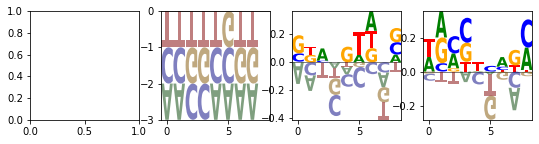

Epoch:  1, Loss: -732.9667 , secs per epoch: 0.013 s
Epoch: 201, Loss: -1639.3564 , secs per epoch: 0.014 s
after kernel opt / before shift optim.


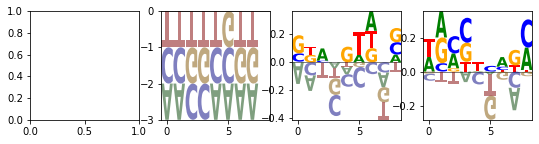

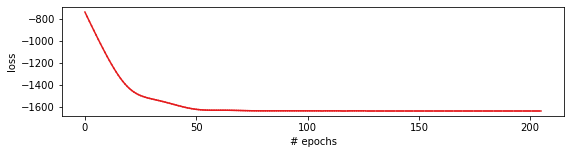

after shift optimz model


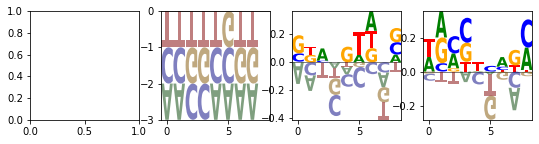

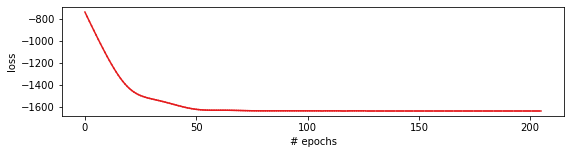


kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None
setting grad status of kernel at 3 to 0
mono grad 3 None
di grad 3 None


before kernel optimization.


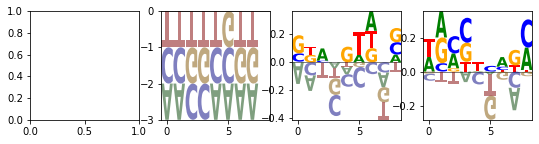

Epoch:  1, Loss: -1639.3634 , secs per epoch: 0.023 s
Epoch: 201, Loss: -1641.8936 , secs per epoch: 0.016 s
Epoch: 401, Loss: -1641.9315 , secs per epoch: 0.016 s
Epoch: 601, Loss: -1641.9374 , secs per epoch: 0.016 s
Epoch: 801, Loss: -1641.8782 , secs per epoch: 0.016 s
after kernel opt / before shift optim.


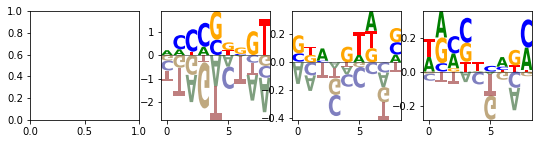

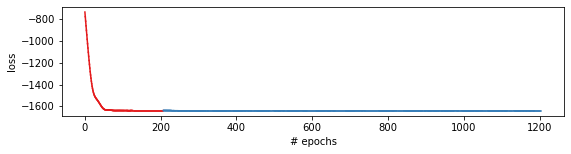


optimize_motif_shift (first)...left
mono grad 1 None
di grad 1 None
mono grad 2 None
di grad 2 None
mono grad 3 None
di grad 3 None
Epoch:  1, Loss: -1641.4657 , secs per epoch: 0.019 s
Epoch: 201, Loss: -1641.7250 , secs per epoch: 0.018 s
Epoch: 401, Loss: -1641.7550 , secs per epoch: 0.017 s
Epoch: 601, Loss: -1641.7623 , secs per epoch: 0.016 s


In [ ]:
for lib in set(adata.obs['library']):
    mask = adata.obs['library'] == lib
    df = adata[mask,:].to_df()
    df = df.reindex(adata[mask,:].obs.sort_values('cycle').index).T
    del df[df.columns[0]]
    has_zero_cycle = sum(adata.obs[mask]['cycle'].isin({0})) > 0
    print('Next query')
    print(lib, df.shape, has_zero_cycle)
    if not has_zero_cycle:
        print('skip: zero round not found\n')
        continue
    # print(df.head())
    
    # assert False
    # parse data
    # data = df[df.sum(axis=1) > 100]
    data = df.reindex(df[df.columns[1:]].sum(axis=1).sort_values(ascending=False).head(500).index)
    data.columns = [i for i in range(data.shape[1])]
    # print(data.sum(axis=1).value_counts())
    data = data.reset_index()
    data = data.rename(columns={'index': 'seq'})
    # data.shape
    # data.sum(axis=1).value_counts()
    # assert False
    
    # seed finding
    
    seed = mb.tl.get_seed(data, 8, n=1) # mb.tl.get_seed(data, 7)
    print('seed', seed)
    
    # assert False
    
    n_rounds = data.shape[1] - 2
    # from matplotlib import rcParams
    # rcParams['figure.figsize'] = 9, 2
    # assign batch and data type
    rcParams['figure.figsize'] = 9, 2

    data['batch'] = 1
    data['is_count_data'] = 1

    print('loading object (# entries)', data.shape[0])
    dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, single_encoding_step=True)
    train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

    model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=9, max_w=10, n_kernels=4, log_each=200, early_stopping=100,
                                                      seed=seed, num_epochs=1000, optimize_motif_shift=True, lr=0.1, weight_decay=0.01)                
    res = []
    model_by_k = {}
    
    print('done\n\n\n')

    
    

loading object (# entries) 516366


/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/multibind/multibind/tl/encoding.py:10: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "onehot_mononuc" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/multibind/multibind/tl/encoding.py (12)

File "../../multibind/tl/encoding.py", line 12:
def onehot_mononuc(seq, label_encoder=LabelEncoder(), onehot_encoder=OneHotEncoder(sparse=False)):
    seq_arr = np.array(list(seq + "ACGNT"))
    ^

  @jit
/home/rio/miniconda3/envs/multibind/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "onehot_mononuc" was compiled in object mode without forceobj=True.

File "../../multibind/tl/encoding.py", line 11:
@jit
def onehot_mononuc(seq, label_encoder=LabelEncoder(), onehot_encoder=OneHotEncoder(sparse=False)):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/

# rounds 4
# batches 1
next w 9
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None


before kernel optimization.


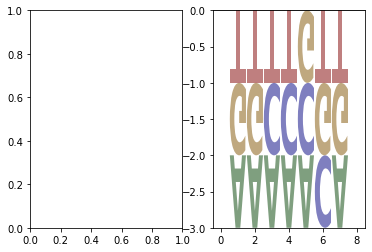

Epoch:  1, Loss: -2.3993 , secs per epoch: 5.907 s


KeyboardInterrupt: 

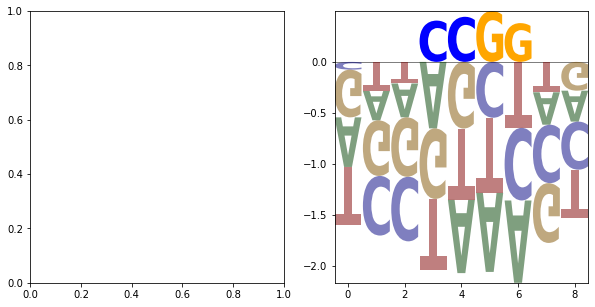

In [222]:
mb.pl.conv_mono(model_by_k_next['9'], figsize=[10, 5])

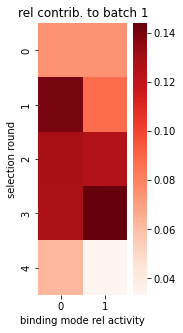

In [149]:
mb.pl.plot_activities(model, train, figsize=[2, 5])